In [19]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
people = ["Ben Afflek", "Elton John", "Jerry Seinfield", "Madonna", "Mindy Kaling"]
mainpath = ""
trainpath = os.path.join(mainpath,"Faces/train/")

In [3]:
haar_cascade = cv.CascadeClassifier(mainpath+'haar_face.xml')

## Function to show the image in the jupyter-notebook with matplotlib

In [10]:
def imshow(title, image, figsize=(5,5)):
    # Matplotlib funciona con RGB, mientras que OpenCV trabaja con BGR.
    plt.figure(figsize=figsize)
    img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [24]:
people = os.listdir(trainpath)
people

['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

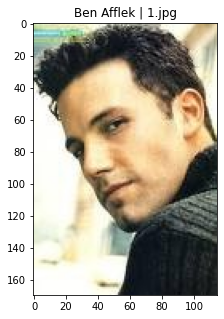

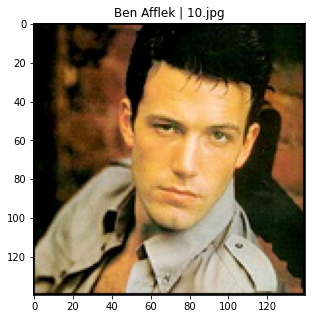

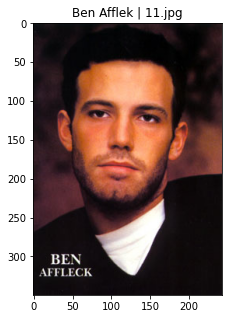

In [21]:
person = os.listdir(trainpath)[0]
for file in os.listdir(os.path.join(trainpath, person))[:3]:
    img = cv.imread(os.path.join(trainpath, person, file))
    imshow(f"{person} | {file}", img)

## Train cascade classifier with some images

In [4]:
features = []
labels = []

def create_train():
    
    # loop through all the people
    for person in people:
        path = os.path.join(trainpath,person)
        label = people.index(person)
        
        # loop through all the images
        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            
            # load the image
            img = cv.imread(img_path)
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            
            # detect his face
            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
            
            # save the ROI (Region of interest) & the label
            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h,x:x+w]  # roi = region of interest
                features.append(faces_roi)
                labels.append(label)
            
create_train()

features = np.array(features, dtype='object')
labels = np.array(labels)

In [5]:
d = dict()
for p in people: d[p] = 0
for l in labels: d[people[l]] += 1
for k,c in d.items(): print(f"{k}: {c}")

Ben Afflek: 12
Elton John: 16
Jerry Seinfield: 26
Madonna: 22
Mindy Kaling: 24


In [6]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [7]:
face_recognizer.train(features,labels)

In [8]:
face_recognizer.save('face_trained.yml')

In [9]:
np.save('features.npy', features)
np.save('labels.npy', labels)

## Face Recognition

In [27]:
def predict(person, photo):
    
    img = cv.imread(f"{mainpath}val/{person}/{photo}.jpg")
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imshow(person.replace("_"," ").title(), gray)

    faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

    for (x,y,w,h) in faces_rect:
        face_roi = gray[y:y+h,x:x+w]

        label, confidence = face_recognizer.predict(face_roi)
        print(f"Label = {people[label]} with a confidence of {confidence}")

        cv.putText(img, str(people[label]), (20,30), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
        cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

    imshow("Detected Face", img)

## Show results

In [33]:
people_val = os.listdir(os.path.join(mainpath,"Faces/val/"))
people_val

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']

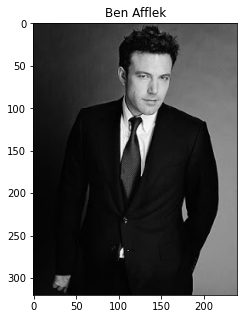

Label = Ben Afflek with a confidence of 90.68315311873681


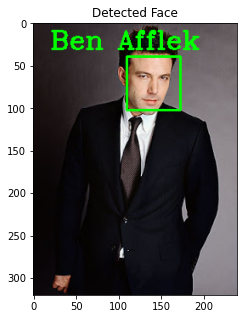

In [28]:
predict("ben_afflek", "3")

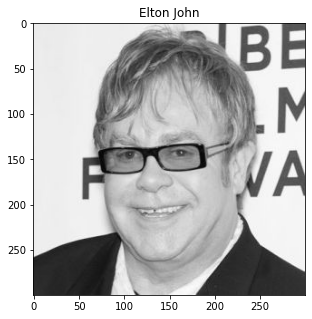

Label = Elton John with a confidence of 67.00856809674691


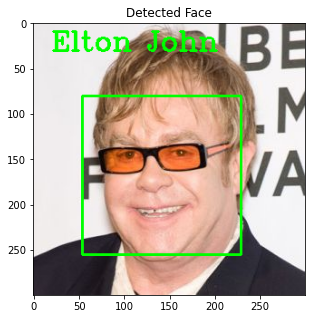

In [36]:
predict("elton_john", "1")

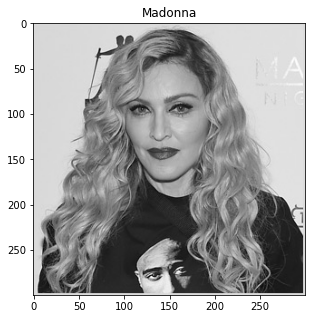

Label = Madonna with a confidence of 78.75449489280508


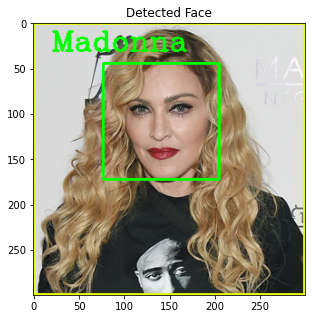

In [38]:
predict("madonna", "3")

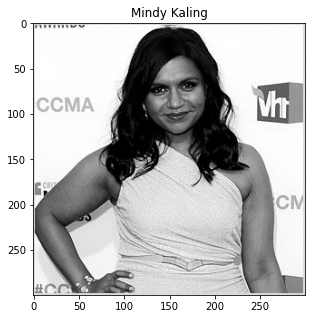

Label = Mindy Kaling with a confidence of 87.49866498716416


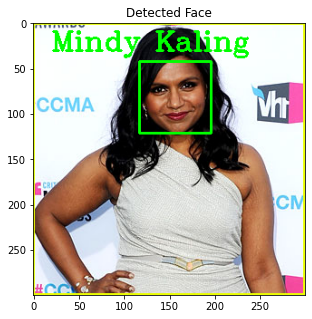

In [39]:
predict("mindy_kaling", "2")

### In this trainning has been very few images, so the model also failed a lot.

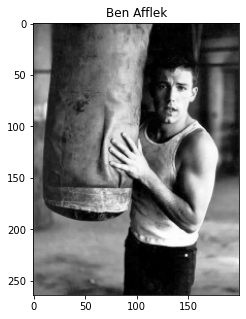

Label = Jerry Seinfield with a confidence of 131.35026072427803


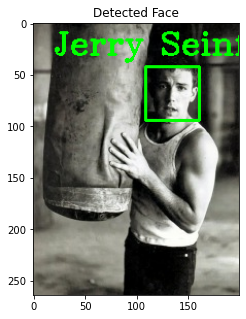

In [41]:
predict("ben_afflek", "4")